In [60]:
import pandas as pd
import numpy as np

In [61]:
preference = pd.read_csv('/content/Guest_preference_cleaned.csv')
feedback = pd.read_csv('/content/GuestsFeedback_cleaned.csv')
guest = pd.read_csv('/content/Guests_cleaned.csv')
service = pd.read_csv('/content/Services.csv')

# Explore Guest Data

In [62]:
guest.head()

,GuestID,FirstName,LastName,Email,PhoneNumber,Nationality,DateOfBirth,RegistrationDate,YearMonth,Year,Month
0,1,Ahmed,Ibrahim,ahmed.ibrahim@hotmail.com,+20 1039958838,Egyptian,1957-12-04,2025-12-18,2025-12,2025,12
1,2,Mariam,Ahmed,mariam.ahmed@gmail.com,+20 1022575562,Egyptian,1967-04-17,2024-01-18,2024-01,2024,1
2,3,Hoda,Nasser,hoda.nasser@hotmail.com,+20 1070291817,Egyptian,1975-01-25,2021-12-14,2021-12,2021,12
3,4,Ibrahim,Hassan,ibrahim.hassan@yahoo.com,+20 1023718431,Egyptian,1951-07-04,2022-06-20,2022-06,2022,6
4,5,Mohamed,Farouk,mohamed.farouk@yahoo.com.eg,+20 1026753883,Egyptian,1988-02-18,2022-11-20,2022-11,2022,11


In [63]:
guest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GuestID           3000 non-null   int64 
 1   FirstName         3000 non-null   object
 2   LastName          3000 non-null   object
 3   Email             3000 non-null   object
 4   PhoneNumber       3000 non-null   object
 5   Nationality       3000 non-null   object
 6   DateOfBirth       3000 non-null   object
 7   RegistrationDate  3000 non-null   object
 8   YearMonth         3000 non-null   object
 9   Year              3000 non-null   int64 
 10  Month             3000 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 257.9+ KB


In [64]:
guest.describe()

,GuestID,Year,Month
count,3000.000000,3000.000000,3000.000000
mean,1500.500000,2022.505667,6.397333
std,866.169729,1.704974,3.474308
min,1.000000,2020.000000,1.000000
25%,750.750000,2021.000000,3.000000
50%,1500.500000,2023.000000,6.000000
75%,2250.250000,2024.000000,9.000000
max,3000.000000,2025.000000,12.000000


In [65]:
guest.describe(include= 'object')

,FirstName,LastName,Email,PhoneNumber,Nationality,DateOfBirth,RegistrationDate,YearMonth
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,57,30,3000,3000,10,2784,1554,72
top,Sara,Ali,jessica.moore@hotmail.com.eg,+44 2014905748,Egyptian,1983-08-22,2024-12-24,2020-06
freq,115,229,1,1,2128,4,7,54


In [66]:
guest['Nationality'].unique()

array(['Egyptian', 'American', 'Emirati', 'Saudi', 'Qatari', 'British',
       'German', 'Kuwaiti', 'Jordanian', 'French'], dtype=object)

In [67]:
guest['Nationality'].value_counts()

,count
Nationality,
Egyptian,2128
Saudi,282
British,151
American,126
Emirati,79
Kuwaiti,72
German,59
Qatari,57
French,24


In [68]:
guest.isnull().sum()

,0
GuestID,0
FirstName,0
LastName,0
Email,0
PhoneNumber,0
Nationality,0
DateOfBirth,0
RegistrationDate,0
YearMonth,0
Year,0


In [69]:
guest['RegistrationDate'] = guest['RegistrationDate'].astype('datetime64[ns]')

In [70]:
guest['DateOfBirth'] = guest['DateOfBirth'].astype('datetime64[ns]')

In [71]:
guest.head()

,GuestID,FirstName,LastName,Email,PhoneNumber,Nationality,DateOfBirth,RegistrationDate,YearMonth,Year,Month
0,1,Ahmed,Ibrahim,ahmed.ibrahim@hotmail.com,+20 1039958838,Egyptian,1957-12-04,2025-12-18,2025-12,2025,12
1,2,Mariam,Ahmed,mariam.ahmed@gmail.com,+20 1022575562,Egyptian,1967-04-17,2024-01-18,2024-01,2024,1
2,3,Hoda,Nasser,hoda.nasser@hotmail.com,+20 1070291817,Egyptian,1975-01-25,2021-12-14,2021-12,2021,12
3,4,Ibrahim,Hassan,ibrahim.hassan@yahoo.com,+20 1023718431,Egyptian,1951-07-04,2022-06-20,2022-06,2022,6
4,5,Mohamed,Farouk,mohamed.farouk@yahoo.com.eg,+20 1026753883,Egyptian,1988-02-18,2022-11-20,2022-11,2022,11


In [72]:
# Average Guests Age
today = pd.to_datetime("today")
guest['Age'] = (today - pd.to_datetime(guest['DateOfBirth'])).dt.days / 365
guest['Age'].mean()


np.float64(52.6388502283105)

# Explore preference Data

In [73]:
preference.head()

,GuestID,Preferences
0,1,Sea View
1,4,"Twin Beds, Early Check-in, Late Check-out"
2,7,"Early Check-in, King Bed"
3,11,Sea View
4,15,"Early Check-in, King Bed"


# Split Preference column in different columns

In [74]:
# Split
prefs = preference["Preferences"].str.split(",", expand=True)
prefs = prefs.apply(lambda col: col.str.strip())
prefs.columns = [f"Pref{i+1}" for i in range(prefs.shape[1])]

df = pd.concat([preference, prefs], axis=1)


print(df)

      GuestID                                Preferences           Pref1  \
0           1                                   Sea View        Sea View   
1           4  Twin Beds, Early Check-in, Late Check-out       Twin Beds   
2           7                   Early Check-in, King Bed  Early Check-in   
3          11                                   Sea View        Sea View   
4          15                   Early Check-in, King Bed  Early Check-in   
...       ...                                        ...             ...   
1195     2994                                   King Bed        King Bed   
1196     2996                 Quiet Room, Late Check-out      Quiet Room   
1197     2997                                Non-smoking     Non-smoking   
1198     2998                                Non-smoking     Non-smoking   
1199     3000                                 High Floor      High Floor   

               Pref2           Pref3 Pref4  
0               None            None  None

In [75]:
# which hotel preferences are most popular
preference['Preferences'].value_counts().head()

,count
Preferences,
Twin Beds,71
Early Check-in,63
Quiet Room,57
Sea View,57
King Bed,53


# Explore Feedback Data

In [76]:
feedback.head()

,GuestID,ServiceID,Rating,Comments,FeedbackDate
0,66,9,3,Fair experience,2023-12-18
1,2584,8,5,Amazing staff!,2024-02-21
2,1251,10,2,Poor service,2021-03-13
3,299,10,4,Nice experience,2022-11-02
4,3,6,3,Okay service,2020-07-09


In [77]:
feedback['Rating'].describe()

,Rating
count,8000.000000
mean,3.757000
std,1.146131
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [78]:
feedback['Rating'].value_counts()

,count
Rating,
4,2752
5,2466
3,1578
2,780
1,424


# Explore Service Data

In [79]:
service.head()

,ServiceID,ServiceName,Description,BasePrice,ServiceType,IsChargeable,UnitOfMeasure
0,1,Restaurant - Breakfast,Buffet breakfast service,25,F&B,Yes,per person
1,2,Restaurant - Lunch,À la carte lunch menu,35,F&B,Yes,per person
2,3,Restaurant - Dinner,Fine dining dinner service,55,F&B,Yes,per person
3,4,Room Service,24-hour in-room dining service,0,F&B,Yes,per order
4,5,Bar Service,Premium bar and cocktail service,0,F&B,Yes,per drink


In [80]:
service[['ServiceName','BasePrice']]

,ServiceName,BasePrice
0,Restaurant - Breakfast,25
1,Restaurant - Lunch,35
2,Restaurant - Dinner,55
3,Room Service,0
4,Bar Service,0
5,Spa Treatment,80
6,Massage Therapy,60
7,Laundry Service,15
8,Gym Access,10
9,WiFi Access,5


# Discover Feedback with Service

In [81]:
feedback_services = feedback.merge(service, on='ServiceID')
feedback_services.head()

,GuestID,ServiceID,Rating,Comments,FeedbackDate,ServiceName,Description,BasePrice,ServiceType,IsChargeable,UnitOfMeasure
0,66,9,3,Fair experience,2023-12-18,Gym Access,Full fitness center access,10,Wellness,Yes,per day
1,2584,8,5,Amazing staff!,2024-02-21,Laundry Service,Same-day laundry and dry cleaning,15,Guest Service,Yes,per item
2,1251,10,2,Poor service,2021-03-13,WiFi Access,High-speed internet access,5,Technology,Yes,per day
3,299,10,4,Nice experience,2022-11-02,WiFi Access,High-speed internet access,5,Technology,Yes,per day
4,3,6,3,Okay service,2020-07-09,Spa Treatment,Facial and body spa treatments,80,Wellness,Yes,per session


# Which service has highest rating

In [82]:
feedback_services.groupby('ServiceName')['Rating'].mean().sort_values(ascending=False)

,Rating
ServiceName,
Spa Treatment,3.810761
WiFi Access,3.809619
City Tour,3.809160
Airport Transfer,3.806773
Restaurant - Lunch,3.794376
Restaurant - Dinner,3.784274
Car Rental,3.776091
Massage Therapy,3.752381
Business Center,3.745318


# Which service gets most comments?

In [83]:
feedback_services['ServiceName'].value_counts()

,count
ServiceName,
Room Service,596
Restaurant - Lunch,569
Babysitting,560
Laundry Service,549
Bar Service,547
Spa Treatment,539
Business Center,534
Gym Access,531
Car Rental,527


# Guest with Preferences

In [84]:
guest_full = guest.merge(preference, on='GuestID', how='left')
guest_full.head()

,GuestID,FirstName,LastName,Email,PhoneNumber,Nationality,DateOfBirth,RegistrationDate,YearMonth,Year,Month,Age,Preferences
0,1,Ahmed,Ibrahim,ahmed.ibrahim@hotmail.com,+20 1039958838,Egyptian,1957-12-04,2025-12-18,2025-12,2025,12,68.060274,Sea View
1,2,Mariam,Ahmed,mariam.ahmed@gmail.com,+20 1022575562,Egyptian,1967-04-17,2024-01-18,2024-01,2024,1,58.687671,NaN
2,3,Hoda,Nasser,hoda.nasser@hotmail.com,+20 1070291817,Egyptian,1975-01-25,2021-12-14,2021-12,2021,12,50.906849,NaN
3,4,Ibrahim,Hassan,ibrahim.hassan@yahoo.com,+20 1023718431,Egyptian,1951-07-04,2022-06-20,2022-06,2022,6,74.484932,"Twin Beds, Early Check-in, Late Check-out"
4,5,Mohamed,Farouk,mohamed.farouk@yahoo.com.eg,+20 1026753883,Egyptian,1988-02-18,2022-11-20,2022-11,2022,11,37.832877,NaN


# Simple Visualizations

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

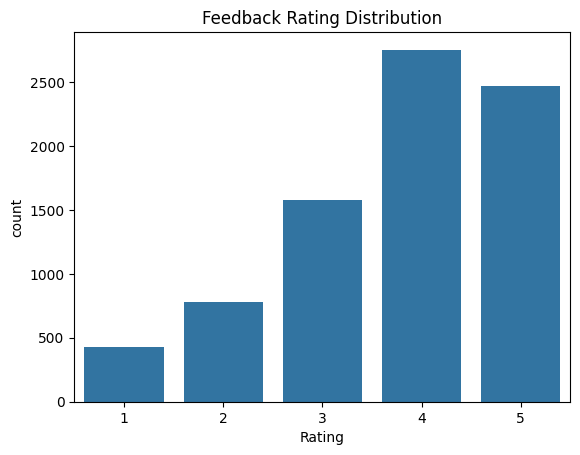

In [86]:
sns.countplot(data=feedback, x='Rating')
plt.title("Feedback Rating Distribution")
plt.show()

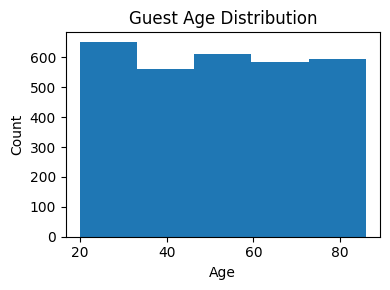

In [87]:
plt.figure(figsize=(4,3))
guest["Age"].plot(kind='hist', bins=5)
plt.title("Guest Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("age_distribution.png")
plt.show()
plt.close()